#**Crafting Strategic Insights In Restaurant Services - Level 1**

##**Objective**

The main objective of the project is to derive valuable insights from the Restaurants datasets, gain a comprehension of customer behavior, examine the sales and pricing, monitor the services and evalute the performance of restaurants.This data holds significance for decision- making for new chain establishment, refining the market strategies and enhancing overall business operations pertaining to the sales and services.

##**Prerequisites & Data Preparation**

The notebook contains code focused on restaurants data,  initial data exploration, feature engineering-devising metrics, feature scaling, and evaluating the

Libraries and Data Setup:

Import necessary libraries (pandas, numpy, sklearn, etc.).
uploading the dataset to pandas dataframe and querying the data.

Data Preparation:

Several preprocessing steps (cleaning, feature engineering, etc.) appear to have been performed.
Features are scaled using StandardScaler.

Visualisation:



## **Importing Necessary Libraries and importing dataset**

In [1]:
# Install pandasql
!pip install pandasql
import pandasql as psql

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=c4de13741d7e8db4dfe1d1ece9e570601ab6b19ee436a53695c4ae36e754f392
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


## **Read the CSV file**

In [2]:
# Upload the CSV file manually in Colab first
# Then read the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/LeelaYathapu/Cognifyz-Restaurant-Service-Analysis/refs/heads/main/Dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## **Data Cleaning**

In [3]:
#Checking size of dataframe
df.shape

(9551, 21)

Observation:
There are 9551 rows with 21 columns (features)

In [4]:
#Checking the datatype and null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Observation:
There are three types of data types : float, int , object
Total 9551 rows are present in all columns except Cuisines having some missing values

In [5]:
# Checking the number of missing values in each columns
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


Observation
Cuisines column has 9 missing values rows
Since only once instance of resturant is present for each of these missing values and there are no values to impute based on similar rows, we can drop the rows after clarifying with client or statkeholder.

In [6]:
# We can drop null values using drop
#and save the data in new varaible
df1 = df.dropna()
df1.shape

(9542, 21)

In [7]:
# Cross check for null values
df1.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [18]:
#Save the results to a CSV file
df1.to_csv('Cleaned_Dataset.csv', index=False)

In [19]:
df = df1

In [ ]:
url= "https://raw.githubusercontent.com/LeelaYathapu/Cognifyz-Restaurant-Service-Analysis/refs/heads/main/Cleaned_Dataset.csv"
df = pd.read_csv(url)

# **Task 1: Top Cuisines**
Determine the top three most common cuisines in the dataset.

Calculate the percentage of restaurants that serve each of the top cuisines.# New section

In [20]:
# Write SQL query and run it on your DataFrame

# SQL query to Determine the top three most common cuisines in the dataset.
query1 = """
SELECT Cuisines, COUNT(*) as cuisines_count
FROM df
GROUP BY Cuisines
ORDER BY cuisines_count DESC
LIMIT 4;
"""

# Execute the SQL query
top_cuisines = psql.sqldf(query1, locals())

# Show the result
print(top_cuisines)

                Cuisines  cuisines_count
0           North Indian             936
1  North Indian, Chinese             511
2              Fast Food             354
3                Chinese             354


In [21]:
# SQL query to Calculate the percentage of restaurants that serve each of the top cuisines
query2 = """
WITH total_restaurants AS (
    SELECT COUNT(*) AS total_res
    FROM df
),
top_three_cuisines AS (
    SELECT Cuisines, COUNT(*) AS cuisine_count
    FROM df
    WHERE Cuisines IN ('North Indian', 'North Indian, Chinese', 'Chinese')
    GROUP BY Cuisines
)
SELECT
    top_three_cuisines.Cuisines,
    Round((cuisine_count * 100.0 / total_restaurants.total_res),2) AS percentage_of_restaurants
FROM
    top_three_cuisines,
    total_restaurants;
"""

# Execute the SQL query
percentage_of_restaurants = psql.sqldf(query2, locals())

# Show the result
print(percentage_of_restaurants)

                Cuisines  percentage_of_restaurants
0                Chinese                       3.71
1           North Indian                       9.81
2  North Indian, Chinese                       5.36


####**Summary Task 1**

1.Top Three Cuisines
North Indian 936
North Indian, Chinese 511
Chinese 354
Fast Food

2. Percentage of restaurants that serve each of the top cuisines

Percentage of restaurants that serve North Indian cuisines : 9.81 %

Percentage of restaurants that serve North Indian, Chinese cuisines : 5.36 %

Percentage of restaurants that serve Chinese cuisines : 3.71 %

# **Task 2: City Analysis**

1. Identify the city with the highest number
of restaurants in the dataset.

2. Calculate the average rating for
restaurants in each city.

3. Determine the city with the highest
average rating.

In [22]:
# SQL query to Identify the city with the highest number of restaurants in the dataset
query1 = """
SELECT City, COUNT("Restaurant ID") as restaurant_count
FROM df
GROUP BY City
ORDER BY restaurant_count DESC
LIMIT 1;
"""

# Execute the SQL query
top_city = psql.sqldf(query1, locals())

# Show the result
print(top_city)

        City  restaurant_count
0  New Delhi              5473


In [23]:
# SQL query to Calculate the average rating for restaurants in each city
query1 = """
SELECT City, avg("Aggregate rating") as avg_rating
FROM df
GROUP BY City
;
"""

# Execute the SQL query
avg_rating = psql.sqldf(query1, locals())

# Show the result
print(avg_rating)

                City  avg_rating
0          Abu Dhabi    4.300000
1               Agra    3.965000
2          Ahmedabad    4.161905
3             Albany    3.552941
4          Allahabad    3.395000
..               ...         ...
135          Weirton    3.900000
136  Wellington City    4.250000
137   Winchester Bay    3.200000
138          Yorkton    3.300000
139        ��stanbul    4.292857

[140 rows x 2 columns]


In [24]:
# SQL query to Determine the city with the highest average rating.
query1 = """
SELECT City, avg("Aggregate rating") as avg_rating
FROM df
GROUP BY City
ORDER BY avg_rating DESC
Limit 1
;
"""

# Execute the SQL query
highest_avg_rating = psql.sqldf(query1, locals())

# Show the result
print(highest_avg_rating)

         City  avg_rating
0  Inner City         4.9


####**Summary Task 2**
New delhi city has higest 5473 number of restaurants.

The Inner City is Higest avg rating 4.9

The Faridabad city is lowest avg rating 1.87

# **Task 3: Price Range Distribution**

1. Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

2. Calculate the percentage of restaurants
in each price range category.

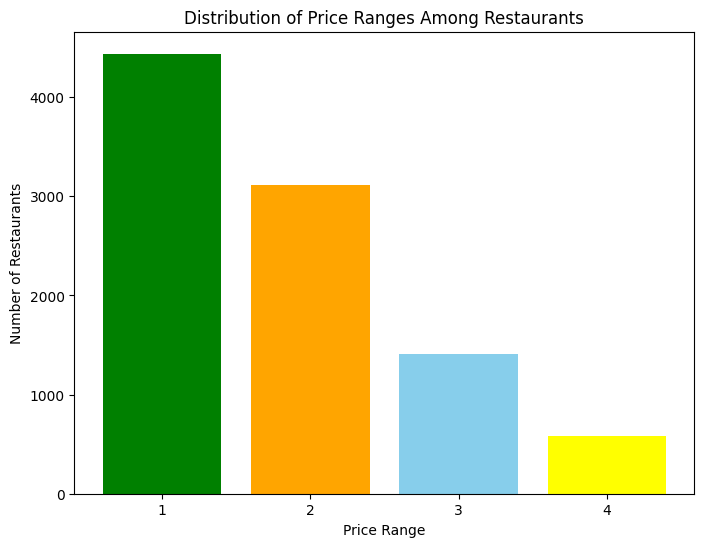

In [25]:
# Grouping the restaurants by price range
price_range_distribution = df["Price range"].value_counts()

# Creating the bar chart
plt.figure(figsize=(8, 6))
#price_range_distribution.plot(kind='bar', color='skyblue')
plt.bar(['1','2','3','4'], list(price_range_distribution.values), color=['green', 'orange', 'skyblue','yellow'])
# Adding title and labels
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')

# Display the chart
plt.show()

In [15]:
# SQL query to Calculate the percentage of restaurants in each price range category.
query1 = """
WITH total_restaurants AS (
    SELECT COUNT(*) AS total_res
    FROM df
)
SELECT
    "Price range",
    Round((COUNT(*) * 100.0 / total_restaurants.total_res),2) AS percentage_restaurants
FROM
    df,
    total_restaurants
GROUP BY "Price range"
ORDER BY percentage_restaurants DESC
    ;
"""

# Execute the SQL query
percentage_restaurants = psql.sqldf(query1, locals())

# Show the result
print(percentage_restaurants)

   Price range  percentage_restaurants
0            1                   46.53
1            2                   32.59
2            3                   14.74
3            4                    6.14


####**Summar Task 3:**

The price range 1 has highest count of around 46.53%

The price range 2 has count of around 32.59%

The price range 3 has count of around 14.74%

The price range 1 has lowest count of around 6.14%



# **Task 4: Online Delivery**

1. Determine the percentage of restaurants
that offer online delivery.

2. Compare the average ratings of restaurants
with and without online delivery.

In [16]:
# SQL query to Determine the percentage of restaurants that offer online delivery.
query1 = """
WITH total_restaurants AS (
    SELECT COUNT(*) AS total_res
    FROM df
)
SELECT
    "Has Online delivery",
    Round((COUNT(*) * 100.0 / total_restaurants.total_res),2) AS online_delivery_percentage
FROM
    df,
    total_restaurants
    where "Has Online delivery" = 'Yes'
GROUP BY "Has Online delivery"
ORDER BY online_delivery_percentage DESC
    ;
"""

# Execute the SQL query
online_delivery_percentage = psql.sqldf(query1, locals())

# Show the result
print(online_delivery_percentage)

  Has Online delivery  online_delivery_percentage
0                 Yes                       25.66


In [17]:
# SQL query to Compare the average ratings of restaurants with and without online delivery.
# First Query: Calculate average ratings and percentages
query1 = """
WITH avg_ratings AS (
    SELECT
        "Has Online delivery",
        AVG("Aggregate rating") AS avg_rating,
        COUNT(*) * 100.0 / (SELECT COUNT(*) FROM df) AS percentage
    FROM
        df
    GROUP BY
        "Has Online delivery"
)

SELECT
    "Has Online delivery",
    avg_rating,
    ROUND(percentage, 2) AS percentage
FROM
    avg_ratings;
"""

# Execute the first query
avg_ratings = psql.sqldf(query1, locals())

# Show the result for avg_ratings
print("Average Ratings and Percentages:\n", avg_ratings)

# Second Query: Calculate the comparison ratio
query2 = """
WITH avg_ratings AS (
    SELECT
        "Has Online delivery",
        AVG("Aggregate rating") AS avg_rating
    FROM
        df
    GROUP BY
        "Has Online delivery"
)

SELECT
    MAX(CASE WHEN "Has Online delivery" = 'Yes' THEN avg_rating END) /
    MAX(CASE WHEN "Has Online delivery" = 'No' THEN avg_rating END) AS comparison_ratio
FROM
    avg_ratings;
"""

# Execute the second query
rating_comparison = psql.sqldf(query2, locals())

# Show the result for rating_comparison
print("Rating Comparison Ratio:\n", rating_comparison)


Average Ratings and Percentages:
   Has Online delivery  avg_rating  percentage
0                  No    2.465296       74.34
1                 Yes    3.248837       25.66
Rating Comparison Ratio:
    comparison_ratio
0          1.317829


####**Summary Task 4**
The Percentage of restaurants that offer online delivery is : 25.66 %

Avarage rating with online delivery: 3.25

Avarage rating without online delivery: 2.46

Comparision of avarage rating with and without Online delivey comparision: 1.32